In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ELU, ReLU, GaussianNoise, Softmax
from keras.optimizers import SGD, Adam
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard
from keras.losses import MeanSquaredError, CategoricalCrossentropy

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10, 8

Using TensorFlow backend.


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred):
    print(f'Accuracy : {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision: {precision_score(y_true, y_pred, average = "macro"):.2f}')
    print(f'Recall   : {recall_score(y_true, y_pred, average = "macro"):.2f}')
    print(f'F1-score : {f1_score(y_true, y_pred, average = "macro"):.2f}')

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


## Exploring dataset a bit

Load the dataset

In [4]:
wine = load_wine()
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [5]:
X = wine.data
Y = wine.target
print(X.shape, Y.shape)

(178, 13) (178,)


Histogram of target values

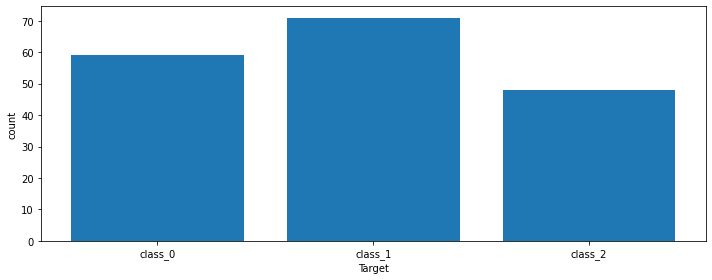

In [6]:
rcParams['figure.figsize'] = 10, 4
plt.bar(wine.target_names, np.unique(Y, return_counts = True)[1])
plt.xlabel('Target')
plt.ylabel('count')
plt.tight_layout()

## Scaling and Train, Test, Valid split

In [7]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Y = Y[:,np.newaxis]
scaler.mean_

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [8]:
ohe = OneHotEncoder().fit(Y)
Ys = ohe.transform(Y)
Ys.shape

(178, 3)

In [9]:
x_train, x_test,  y_train, y_test  = train_test_split(Xs, Ys, test_size = 0.33)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.5)
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Valid = {x_valid.shape}, {y_valid.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (59, 13), (59, 3)
Valid = (60, 13), (60, 3)
Test  = (59, 13), (59, 3)


## Simple Neural Network

In [10]:
model = Sequential(name="Classifier NN")

model.add(Dense(10, input_dim = Xs.shape[1], name = 'dense1'))
model.add(ReLU())
model.add(Dense(Ys.shape[1], name = 'output'))
model.add(Softmax())

model.summary()

Model: "Classifier NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 10)                0         
_________________________________________________________________
output (Dense)               (None, 3)                 33        
_________________________________________________________________
softmax_1 (Softmax)          (None, 3)                 0         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = CategoricalCrossentropy(), optimizer = SGD(), metrics = ['accuracy'])

In [12]:
log = model.fit(x_train, y_train,
    batch_size = 127,
    epochs = 250,
    verbose = 2,
    validation_data=(x_valid, y_valid)
)

Train on 59 samples, validate on 60 samples
Epoch 1/250
 - 0s - loss: 1.0351 - accuracy: 0.4576 - val_loss: 1.1651 - val_accuracy: 0.3167
Epoch 2/250
 - 0s - loss: 1.0268 - accuracy: 0.4576 - val_loss: 1.1563 - val_accuracy: 0.3333
Epoch 3/250
 - 0s - loss: 1.0187 - accuracy: 0.4576 - val_loss: 1.1476 - val_accuracy: 0.3333
Epoch 4/250
 - 0s - loss: 1.0107 - accuracy: 0.4576 - val_loss: 1.1390 - val_accuracy: 0.3500
Epoch 5/250
 - 0s - loss: 1.0029 - accuracy: 0.4746 - val_loss: 1.1306 - val_accuracy: 0.3500
Epoch 6/250
 - 0s - loss: 0.9952 - accuracy: 0.4746 - val_loss: 1.1223 - val_accuracy: 0.3500
Epoch 7/250
 - 0s - loss: 0.9876 - accuracy: 0.4746 - val_loss: 1.1141 - val_accuracy: 0.3500
Epoch 8/250
 - 0s - loss: 0.9802 - accuracy: 0.4746 - val_loss: 1.1061 - val_accuracy: 0.3667
Epoch 9/250
 - 0s - loss: 0.9728 - accuracy: 0.4746 - val_loss: 1.0981 - val_accuracy: 0.3667
Epoch 10/250
 - 0s - loss: 0.9656 - accuracy: 0.5085 - val_loss: 1.0903 - val_accuracy: 0.3667
Epoch 11/250
 -

Epoch 87/250
 - 0s - loss: 0.6239 - accuracy: 0.8305 - val_loss: 0.7148 - val_accuracy: 0.9167
Epoch 88/250
 - 0s - loss: 0.6212 - accuracy: 0.8305 - val_loss: 0.7116 - val_accuracy: 0.9167
Epoch 89/250
 - 0s - loss: 0.6184 - accuracy: 0.8305 - val_loss: 0.7085 - val_accuracy: 0.9167
Epoch 90/250
 - 0s - loss: 0.6157 - accuracy: 0.8305 - val_loss: 0.7054 - val_accuracy: 0.9167
Epoch 91/250
 - 0s - loss: 0.6130 - accuracy: 0.8305 - val_loss: 0.7023 - val_accuracy: 0.9167
Epoch 92/250
 - 0s - loss: 0.6103 - accuracy: 0.8305 - val_loss: 0.6992 - val_accuracy: 0.9167
Epoch 93/250
 - 0s - loss: 0.6077 - accuracy: 0.8305 - val_loss: 0.6962 - val_accuracy: 0.9167
Epoch 94/250
 - 0s - loss: 0.6050 - accuracy: 0.8305 - val_loss: 0.6932 - val_accuracy: 0.9167
Epoch 95/250
 - 0s - loss: 0.6024 - accuracy: 0.8305 - val_loss: 0.6903 - val_accuracy: 0.9167
Epoch 96/250
 - 0s - loss: 0.5999 - accuracy: 0.8305 - val_loss: 0.6873 - val_accuracy: 0.9167
Epoch 97/250
 - 0s - loss: 0.5974 - accuracy: 0.84

Epoch 173/250
 - 0s - loss: 0.4534 - accuracy: 0.9153 - val_loss: 0.5149 - val_accuracy: 0.9500
Epoch 174/250
 - 0s - loss: 0.4520 - accuracy: 0.9153 - val_loss: 0.5131 - val_accuracy: 0.9500
Epoch 175/250
 - 0s - loss: 0.4505 - accuracy: 0.9153 - val_loss: 0.5114 - val_accuracy: 0.9500
Epoch 176/250
 - 0s - loss: 0.4491 - accuracy: 0.9153 - val_loss: 0.5096 - val_accuracy: 0.9500
Epoch 177/250
 - 0s - loss: 0.4476 - accuracy: 0.9153 - val_loss: 0.5079 - val_accuracy: 0.9500
Epoch 178/250
 - 0s - loss: 0.4462 - accuracy: 0.9153 - val_loss: 0.5062 - val_accuracy: 0.9500
Epoch 179/250
 - 0s - loss: 0.4448 - accuracy: 0.9153 - val_loss: 0.5045 - val_accuracy: 0.9500
Epoch 180/250
 - 0s - loss: 0.4433 - accuracy: 0.9153 - val_loss: 0.5028 - val_accuracy: 0.9500
Epoch 181/250
 - 0s - loss: 0.4419 - accuracy: 0.9322 - val_loss: 0.5011 - val_accuracy: 0.9500
Epoch 182/250
 - 0s - loss: 0.4405 - accuracy: 0.9322 - val_loss: 0.4994 - val_accuracy: 0.9500
Epoch 183/250
 - 0s - loss: 0.4391 - acc

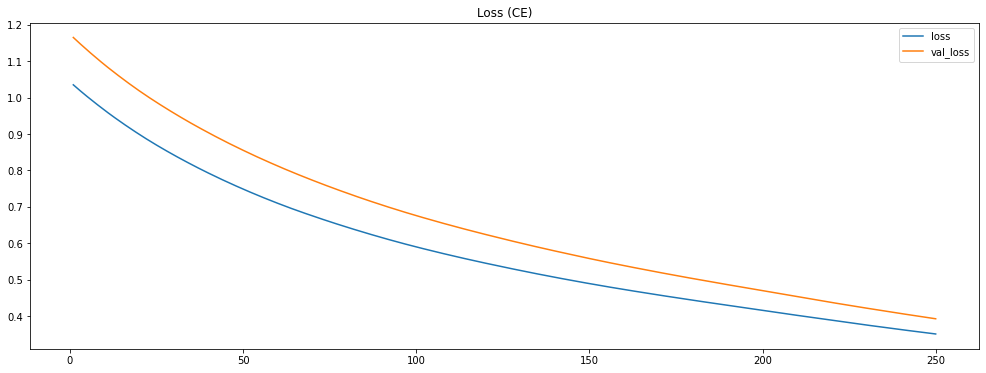

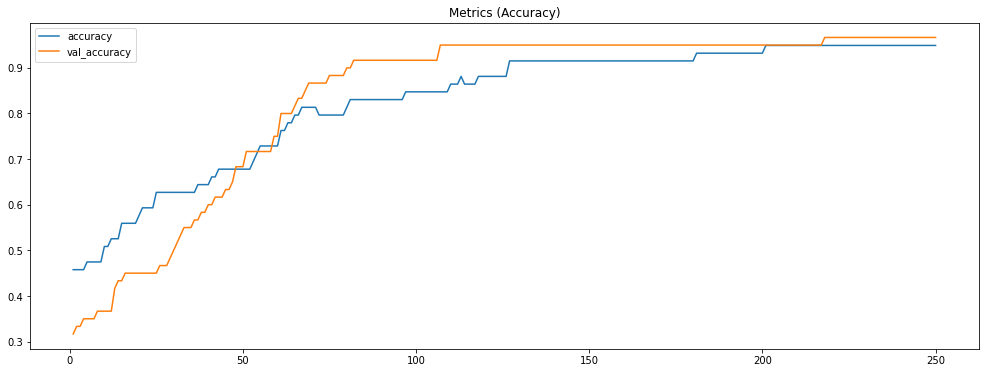

In [13]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (CE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, log.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [14]:
print('Train set:')
print_metrics(ohe.inverse_transform(y_train), model.predict_classes(x_train)[:,np.newaxis])

print()
print('Valid set:')
print_metrics(ohe.inverse_transform(y_valid), model.predict_classes(x_valid)[:,np.newaxis])

print()
print('Test set:')
print_metrics(ohe.inverse_transform(y_test), model.predict_classes(x_test)[:,np.newaxis])

Train set:
Accuracy : 0.95
Precision: 0.94
Recall   : 0.97
F1-score : 0.95

Valid set:
Accuracy : 0.97
Precision: 0.97
Recall   : 0.96
F1-score : 0.97

Test set:
Accuracy : 0.90
Precision: 0.90
Recall   : 0.90
F1-score : 0.90


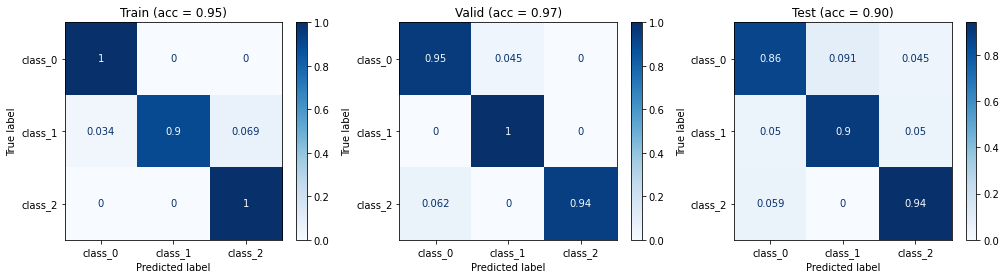

In [15]:
def print_conf_matrix(y_true, y_pred, labels, ax, title):
    disp = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_true, y_pred, normalize = 'true'), display_labels = labels)
    disp.plot(include_values = True, cmap = plt.cm.Blues, ax = ax)
    ax.set_title(f'{title} (acc = {accuracy_score(y_true, y_pred):.2f})')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 4))
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_train)), 
                  model.predict_classes(x_train), wine.target_names, ax1, 'Train')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_valid)), 
                  model.predict_classes(x_valid), wine.target_names, ax2, 'Valid')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_test)), 
                  model.predict_classes(x_test), wine.target_names, ax3, 'Test')

plt.show()

## Increase complexity

In [16]:
model = Sequential(name="Classifier NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(10, name = 'dense2'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(Ys.shape[1], name = 'output'))
model.add(Softmax())

model.summary()

Model: "Classifier NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 10)                0         
_________________________________________________________________
dense2 (Dense)               (None, 10)                110       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)              

In [17]:
model.compile(loss = CategoricalCrossentropy(), optimizer = SGD(), metrics = ['accuracy'])

In [18]:
log = model.fit(x_train, y_train,
    batch_size = 32,
    epochs = 1000,
    verbose = 2,
    validation_data=(x_valid, y_valid)
)

Train on 59 samples, validate on 60 samples
Epoch 1/1000
 - 0s - loss: 2.1731 - accuracy: 0.2203 - val_loss: 1.7060 - val_accuracy: 0.2333
Epoch 2/1000
 - 0s - loss: 2.2188 - accuracy: 0.2542 - val_loss: 1.6269 - val_accuracy: 0.2333
Epoch 3/1000
 - 0s - loss: 1.7730 - accuracy: 0.2034 - val_loss: 1.5758 - val_accuracy: 0.2333
Epoch 4/1000
 - 0s - loss: 1.8175 - accuracy: 0.2712 - val_loss: 1.5152 - val_accuracy: 0.2167
Epoch 5/1000
 - 0s - loss: 1.6150 - accuracy: 0.3220 - val_loss: 1.4713 - val_accuracy: 0.2333
Epoch 6/1000
 - 0s - loss: 1.5666 - accuracy: 0.3898 - val_loss: 1.4242 - val_accuracy: 0.2667
Epoch 7/1000
 - 0s - loss: 1.7579 - accuracy: 0.2203 - val_loss: 1.3728 - val_accuracy: 0.3000
Epoch 8/1000
 - 0s - loss: 1.3597 - accuracy: 0.3220 - val_loss: 1.3454 - val_accuracy: 0.3000
Epoch 9/1000
 - 0s - loss: 1.4501 - accuracy: 0.3559 - val_loss: 1.3186 - val_accuracy: 0.3000
Epoch 10/1000
 - 0s - loss: 1.7860 - accuracy: 0.2203 - val_loss: 1.2820 - val_accuracy: 0.3167
Epoch

Epoch 86/1000
 - 0s - loss: 0.8067 - accuracy: 0.6610 - val_loss: 0.6200 - val_accuracy: 0.9333
Epoch 87/1000
 - 0s - loss: 0.8613 - accuracy: 0.5085 - val_loss: 0.6169 - val_accuracy: 0.9500
Epoch 88/1000
 - 0s - loss: 0.8517 - accuracy: 0.6780 - val_loss: 0.6136 - val_accuracy: 0.9333
Epoch 89/1000
 - 0s - loss: 0.8909 - accuracy: 0.5593 - val_loss: 0.6116 - val_accuracy: 0.9333
Epoch 90/1000
 - 0s - loss: 0.9374 - accuracy: 0.5254 - val_loss: 0.6105 - val_accuracy: 0.9333
Epoch 91/1000
 - 0s - loss: 0.8229 - accuracy: 0.6949 - val_loss: 0.6079 - val_accuracy: 0.9333
Epoch 92/1000
 - 0s - loss: 0.8430 - accuracy: 0.6441 - val_loss: 0.6051 - val_accuracy: 0.9333
Epoch 93/1000
 - 0s - loss: 0.7153 - accuracy: 0.6949 - val_loss: 0.6034 - val_accuracy: 0.9333
Epoch 94/1000
 - 0s - loss: 0.8073 - accuracy: 0.6271 - val_loss: 0.6007 - val_accuracy: 0.9333
Epoch 95/1000
 - 0s - loss: 0.7747 - accuracy: 0.6441 - val_loss: 0.5973 - val_accuracy: 0.9333
Epoch 96/1000
 - 0s - loss: 0.7617 - acc

Epoch 171/1000
 - 0s - loss: 0.5788 - accuracy: 0.7288 - val_loss: 0.4189 - val_accuracy: 0.9667
Epoch 172/1000
 - 0s - loss: 0.5809 - accuracy: 0.7627 - val_loss: 0.4163 - val_accuracy: 0.9667
Epoch 173/1000
 - 0s - loss: 0.7255 - accuracy: 0.6780 - val_loss: 0.4145 - val_accuracy: 0.9667
Epoch 174/1000
 - 0s - loss: 0.7567 - accuracy: 0.6949 - val_loss: 0.4151 - val_accuracy: 0.9667
Epoch 175/1000
 - 0s - loss: 0.6997 - accuracy: 0.7119 - val_loss: 0.4144 - val_accuracy: 0.9667
Epoch 176/1000
 - 0s - loss: 0.5994 - accuracy: 0.7458 - val_loss: 0.4115 - val_accuracy: 0.9667
Epoch 177/1000
 - 0s - loss: 0.5344 - accuracy: 0.8136 - val_loss: 0.4088 - val_accuracy: 0.9667
Epoch 178/1000
 - 0s - loss: 0.5445 - accuracy: 0.8305 - val_loss: 0.4067 - val_accuracy: 0.9667
Epoch 179/1000
 - 0s - loss: 0.6351 - accuracy: 0.7288 - val_loss: 0.4046 - val_accuracy: 0.9667
Epoch 180/1000
 - 0s - loss: 0.5965 - accuracy: 0.7797 - val_loss: 0.4018 - val_accuracy: 0.9667
Epoch 181/1000
 - 0s - loss: 0

Epoch 256/1000
 - 0s - loss: 0.4922 - accuracy: 0.8136 - val_loss: 0.2960 - val_accuracy: 0.9833
Epoch 257/1000
 - 0s - loss: 0.5058 - accuracy: 0.7797 - val_loss: 0.2940 - val_accuracy: 0.9833
Epoch 258/1000
 - 0s - loss: 0.5378 - accuracy: 0.7288 - val_loss: 0.2940 - val_accuracy: 0.9833
Epoch 259/1000
 - 0s - loss: 0.5975 - accuracy: 0.7797 - val_loss: 0.2923 - val_accuracy: 0.9833
Epoch 260/1000
 - 0s - loss: 0.4577 - accuracy: 0.8644 - val_loss: 0.2899 - val_accuracy: 0.9833
Epoch 261/1000
 - 0s - loss: 0.5239 - accuracy: 0.8305 - val_loss: 0.2897 - val_accuracy: 0.9833
Epoch 262/1000
 - 0s - loss: 0.6105 - accuracy: 0.6441 - val_loss: 0.2886 - val_accuracy: 0.9833
Epoch 263/1000
 - 0s - loss: 0.4706 - accuracy: 0.8136 - val_loss: 0.2869 - val_accuracy: 0.9833
Epoch 264/1000
 - 0s - loss: 0.4068 - accuracy: 0.8644 - val_loss: 0.2844 - val_accuracy: 0.9833
Epoch 265/1000
 - 0s - loss: 0.5729 - accuracy: 0.7966 - val_loss: 0.2838 - val_accuracy: 0.9833
Epoch 266/1000
 - 0s - loss: 0

Epoch 341/1000
 - 0s - loss: 0.4094 - accuracy: 0.8644 - val_loss: 0.2170 - val_accuracy: 0.9833
Epoch 342/1000
 - 0s - loss: 0.4948 - accuracy: 0.8136 - val_loss: 0.2161 - val_accuracy: 0.9833
Epoch 343/1000
 - 0s - loss: 0.5326 - accuracy: 0.7119 - val_loss: 0.2155 - val_accuracy: 0.9833
Epoch 344/1000
 - 0s - loss: 0.5228 - accuracy: 0.8136 - val_loss: 0.2146 - val_accuracy: 0.9833
Epoch 345/1000
 - 0s - loss: 0.4257 - accuracy: 0.8305 - val_loss: 0.2136 - val_accuracy: 0.9833
Epoch 346/1000
 - 0s - loss: 0.4567 - accuracy: 0.7966 - val_loss: 0.2123 - val_accuracy: 0.9833
Epoch 347/1000
 - 0s - loss: 0.4084 - accuracy: 0.8136 - val_loss: 0.2107 - val_accuracy: 0.9833
Epoch 348/1000
 - 0s - loss: 0.4870 - accuracy: 0.7966 - val_loss: 0.2094 - val_accuracy: 0.9833
Epoch 349/1000
 - 0s - loss: 0.4989 - accuracy: 0.7966 - val_loss: 0.2084 - val_accuracy: 0.9833
Epoch 350/1000
 - 0s - loss: 0.3755 - accuracy: 0.8475 - val_loss: 0.2069 - val_accuracy: 0.9833
Epoch 351/1000
 - 0s - loss: 0

Epoch 426/1000
 - 0s - loss: 0.3938 - accuracy: 0.9153 - val_loss: 0.1632 - val_accuracy: 0.9833
Epoch 427/1000
 - 0s - loss: 0.4505 - accuracy: 0.8305 - val_loss: 0.1633 - val_accuracy: 0.9833
Epoch 428/1000
 - 0s - loss: 0.3398 - accuracy: 0.9153 - val_loss: 0.1625 - val_accuracy: 0.9833
Epoch 429/1000
 - 0s - loss: 0.4560 - accuracy: 0.8136 - val_loss: 0.1615 - val_accuracy: 0.9833
Epoch 430/1000
 - 0s - loss: 0.4649 - accuracy: 0.7797 - val_loss: 0.1609 - val_accuracy: 0.9833
Epoch 431/1000
 - 0s - loss: 0.3922 - accuracy: 0.8305 - val_loss: 0.1601 - val_accuracy: 0.9833
Epoch 432/1000
 - 0s - loss: 0.4519 - accuracy: 0.7966 - val_loss: 0.1591 - val_accuracy: 0.9833
Epoch 433/1000
 - 0s - loss: 0.4743 - accuracy: 0.8136 - val_loss: 0.1586 - val_accuracy: 0.9833
Epoch 434/1000
 - 0s - loss: 0.4937 - accuracy: 0.7797 - val_loss: 0.1578 - val_accuracy: 0.9833
Epoch 435/1000
 - 0s - loss: 0.2771 - accuracy: 0.9661 - val_loss: 0.1574 - val_accuracy: 0.9833
Epoch 436/1000
 - 0s - loss: 0

Epoch 511/1000
 - 0s - loss: 0.3317 - accuracy: 0.8983 - val_loss: 0.1267 - val_accuracy: 0.9833
Epoch 512/1000
 - 0s - loss: 0.4359 - accuracy: 0.8644 - val_loss: 0.1264 - val_accuracy: 0.9833
Epoch 513/1000
 - 0s - loss: 0.4099 - accuracy: 0.8814 - val_loss: 0.1265 - val_accuracy: 0.9833
Epoch 514/1000
 - 0s - loss: 0.3674 - accuracy: 0.8983 - val_loss: 0.1264 - val_accuracy: 0.9833
Epoch 515/1000
 - 0s - loss: 0.3906 - accuracy: 0.8644 - val_loss: 0.1263 - val_accuracy: 0.9833
Epoch 516/1000
 - 0s - loss: 0.3805 - accuracy: 0.8475 - val_loss: 0.1263 - val_accuracy: 0.9833
Epoch 517/1000
 - 0s - loss: 0.4197 - accuracy: 0.8644 - val_loss: 0.1262 - val_accuracy: 0.9833
Epoch 518/1000
 - 0s - loss: 0.3017 - accuracy: 0.8983 - val_loss: 0.1254 - val_accuracy: 0.9833
Epoch 519/1000
 - 0s - loss: 0.3513 - accuracy: 0.8475 - val_loss: 0.1248 - val_accuracy: 0.9833
Epoch 520/1000
 - 0s - loss: 0.4725 - accuracy: 0.7797 - val_loss: 0.1245 - val_accuracy: 0.9833
Epoch 521/1000
 - 0s - loss: 0

Epoch 596/1000
 - 0s - loss: 0.3745 - accuracy: 0.8475 - val_loss: 0.0998 - val_accuracy: 0.9833
Epoch 597/1000
 - 0s - loss: 0.4305 - accuracy: 0.8644 - val_loss: 0.0997 - val_accuracy: 0.9833
Epoch 598/1000
 - 0s - loss: 0.3206 - accuracy: 0.8475 - val_loss: 0.0998 - val_accuracy: 0.9833
Epoch 599/1000
 - 0s - loss: 0.4081 - accuracy: 0.8305 - val_loss: 0.0999 - val_accuracy: 0.9833
Epoch 600/1000
 - 0s - loss: 0.3257 - accuracy: 0.8983 - val_loss: 0.0998 - val_accuracy: 0.9833
Epoch 601/1000
 - 0s - loss: 0.2601 - accuracy: 0.9322 - val_loss: 0.0994 - val_accuracy: 0.9833
Epoch 602/1000
 - 0s - loss: 0.3708 - accuracy: 0.8305 - val_loss: 0.0993 - val_accuracy: 0.9833
Epoch 603/1000
 - 0s - loss: 0.2892 - accuracy: 0.8814 - val_loss: 0.0989 - val_accuracy: 0.9833
Epoch 604/1000
 - 0s - loss: 0.3457 - accuracy: 0.8136 - val_loss: 0.0987 - val_accuracy: 0.9833
Epoch 605/1000
 - 0s - loss: 0.3454 - accuracy: 0.8644 - val_loss: 0.0980 - val_accuracy: 0.9833
Epoch 606/1000
 - 0s - loss: 0

Epoch 681/1000
 - 0s - loss: 0.3313 - accuracy: 0.8475 - val_loss: 0.0799 - val_accuracy: 1.0000
Epoch 682/1000
 - 0s - loss: 0.3483 - accuracy: 0.8305 - val_loss: 0.0797 - val_accuracy: 1.0000
Epoch 683/1000
 - 0s - loss: 0.3781 - accuracy: 0.8814 - val_loss: 0.0794 - val_accuracy: 1.0000
Epoch 684/1000
 - 0s - loss: 0.2682 - accuracy: 0.9322 - val_loss: 0.0791 - val_accuracy: 1.0000
Epoch 685/1000
 - 0s - loss: 0.3551 - accuracy: 0.8814 - val_loss: 0.0788 - val_accuracy: 1.0000
Epoch 686/1000
 - 0s - loss: 0.3534 - accuracy: 0.8983 - val_loss: 0.0787 - val_accuracy: 1.0000
Epoch 687/1000
 - 0s - loss: 0.3337 - accuracy: 0.8475 - val_loss: 0.0786 - val_accuracy: 1.0000
Epoch 688/1000
 - 0s - loss: 0.2830 - accuracy: 0.8983 - val_loss: 0.0783 - val_accuracy: 1.0000
Epoch 689/1000
 - 0s - loss: 0.3602 - accuracy: 0.8814 - val_loss: 0.0781 - val_accuracy: 1.0000
Epoch 690/1000
 - 0s - loss: 0.3374 - accuracy: 0.8305 - val_loss: 0.0778 - val_accuracy: 1.0000
Epoch 691/1000
 - 0s - loss: 0

Epoch 766/1000
 - 0s - loss: 0.3135 - accuracy: 0.8814 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 767/1000
 - 0s - loss: 0.2433 - accuracy: 0.9322 - val_loss: 0.0663 - val_accuracy: 1.0000
Epoch 768/1000
 - 0s - loss: 0.2470 - accuracy: 0.9153 - val_loss: 0.0662 - val_accuracy: 1.0000
Epoch 769/1000
 - 0s - loss: 0.2461 - accuracy: 0.9322 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 770/1000
 - 0s - loss: 0.3072 - accuracy: 0.8475 - val_loss: 0.0659 - val_accuracy: 1.0000
Epoch 771/1000
 - 0s - loss: 0.2476 - accuracy: 0.9153 - val_loss: 0.0658 - val_accuracy: 1.0000
Epoch 772/1000
 - 0s - loss: 0.1522 - accuracy: 0.9492 - val_loss: 0.0656 - val_accuracy: 1.0000
Epoch 773/1000
 - 0s - loss: 0.3194 - accuracy: 0.8305 - val_loss: 0.0653 - val_accuracy: 1.0000
Epoch 774/1000
 - 0s - loss: 0.2205 - accuracy: 0.9492 - val_loss: 0.0653 - val_accuracy: 1.0000
Epoch 775/1000
 - 0s - loss: 0.2248 - accuracy: 0.9153 - val_loss: 0.0651 - val_accuracy: 1.0000
Epoch 776/1000
 - 0s - loss: 0

Epoch 851/1000
 - 0s - loss: 0.2704 - accuracy: 0.9153 - val_loss: 0.0574 - val_accuracy: 1.0000
Epoch 852/1000
 - 0s - loss: 0.2298 - accuracy: 0.8983 - val_loss: 0.0575 - val_accuracy: 1.0000
Epoch 853/1000
 - 0s - loss: 0.1853 - accuracy: 0.9492 - val_loss: 0.0574 - val_accuracy: 1.0000
Epoch 854/1000
 - 0s - loss: 0.2730 - accuracy: 0.8814 - val_loss: 0.0574 - val_accuracy: 1.0000
Epoch 855/1000
 - 0s - loss: 0.3584 - accuracy: 0.8644 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 856/1000
 - 0s - loss: 0.2150 - accuracy: 0.9322 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 857/1000
 - 0s - loss: 0.2923 - accuracy: 0.8814 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 858/1000
 - 0s - loss: 0.2560 - accuracy: 0.8983 - val_loss: 0.0569 - val_accuracy: 1.0000
Epoch 859/1000
 - 0s - loss: 0.2334 - accuracy: 0.9153 - val_loss: 0.0566 - val_accuracy: 1.0000
Epoch 860/1000
 - 0s - loss: 0.2723 - accuracy: 0.9153 - val_loss: 0.0562 - val_accuracy: 1.0000
Epoch 861/1000
 - 0s - loss: 0

Epoch 936/1000
 - 0s - loss: 0.2107 - accuracy: 0.9153 - val_loss: 0.0487 - val_accuracy: 1.0000
Epoch 937/1000
 - 0s - loss: 0.2884 - accuracy: 0.8814 - val_loss: 0.0488 - val_accuracy: 1.0000
Epoch 938/1000
 - 0s - loss: 0.2570 - accuracy: 0.9153 - val_loss: 0.0486 - val_accuracy: 1.0000
Epoch 939/1000
 - 0s - loss: 0.2640 - accuracy: 0.8983 - val_loss: 0.0485 - val_accuracy: 1.0000
Epoch 940/1000
 - 0s - loss: 0.2959 - accuracy: 0.8475 - val_loss: 0.0486 - val_accuracy: 1.0000
Epoch 941/1000
 - 0s - loss: 0.2148 - accuracy: 0.9322 - val_loss: 0.0485 - val_accuracy: 1.0000
Epoch 942/1000
 - 0s - loss: 0.2508 - accuracy: 0.9153 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 943/1000
 - 0s - loss: 0.2513 - accuracy: 0.8983 - val_loss: 0.0482 - val_accuracy: 1.0000
Epoch 944/1000
 - 0s - loss: 0.3687 - accuracy: 0.8305 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 945/1000
 - 0s - loss: 0.2589 - accuracy: 0.9153 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 946/1000
 - 0s - loss: 0

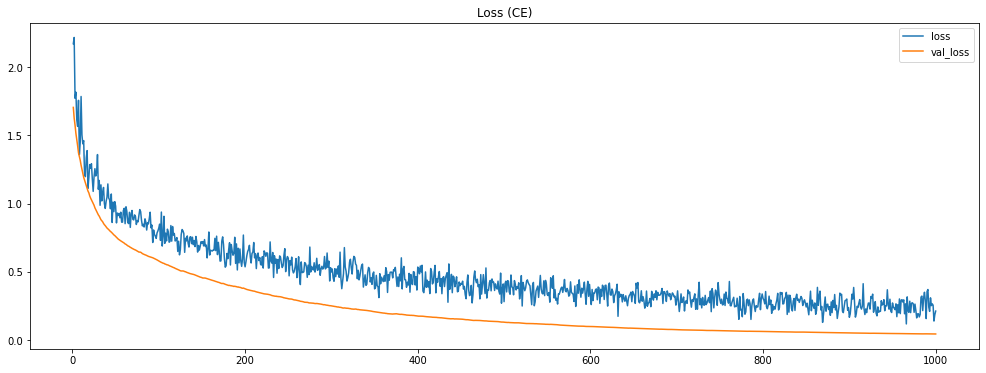

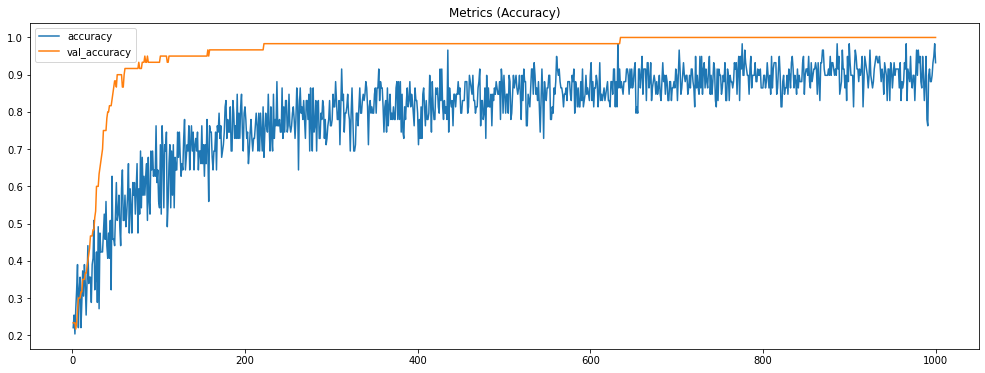

In [19]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (CE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, log.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [20]:
print('Train set:')
print_metrics(ohe.inverse_transform(y_train), model.predict_classes(x_train)[:,np.newaxis])

print()
print('Valid set:')
print_metrics(ohe.inverse_transform(y_valid), model.predict_classes(x_valid)[:,np.newaxis])

print()
print('Test set:')
print_metrics(ohe.inverse_transform(y_test), model.predict_classes(x_test)[:,np.newaxis])

Train set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Valid set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Test set:
Accuracy : 0.98
Precision: 0.98
Recall   : 0.98
F1-score : 0.98


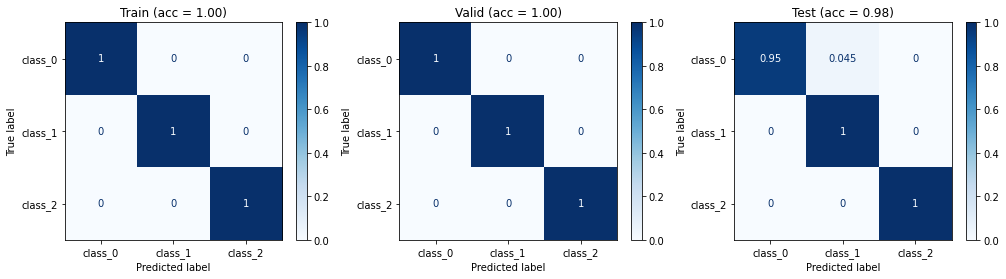

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 4))
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_train)), 
                  model.predict_classes(x_train), wine.target_names, ax1, 'Train')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_valid)), 
                  model.predict_classes(x_valid), wine.target_names, ax2, 'Valid')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_test)), 
                  model.predict_classes(x_test), wine.target_names, ax3, 'Test')
plt.show()

## Early stop

In [22]:
model = Sequential(name="Classifier NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(10, name = 'dense2'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(Ys.shape[1], name = 'output'))
model.add(Softmax())

model.summary()

Model: "Classifier NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 10)                0         
_________________________________________________________________
dense2 (Dense)               (None, 10)                110       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)              

In [23]:
model.compile(loss = CategoricalCrossentropy(), optimizer = SGD(), metrics = ['accuracy'])
es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 50, verbose = 1, restore_best_weights = True)

In [24]:
log = model.fit(x_train, y_train,
    batch_size = 32,
    epochs = 10000,
    verbose = 2,
    validation_data=(x_valid, y_valid),
    callbacks = [ es ]
)

Train on 59 samples, validate on 60 samples
Epoch 1/10000
 - 0s - loss: 1.1759 - accuracy: 0.3729 - val_loss: 0.9608 - val_accuracy: 0.5833
Epoch 2/10000
 - 0s - loss: 1.0844 - accuracy: 0.4915 - val_loss: 0.9510 - val_accuracy: 0.6000
Epoch 3/10000
 - 0s - loss: 1.1988 - accuracy: 0.4068 - val_loss: 0.9400 - val_accuracy: 0.6000
Epoch 4/10000
 - 0s - loss: 1.2669 - accuracy: 0.3390 - val_loss: 0.9326 - val_accuracy: 0.6000
Epoch 5/10000
 - 0s - loss: 1.1765 - accuracy: 0.3729 - val_loss: 0.9218 - val_accuracy: 0.6167
Epoch 6/10000
 - 0s - loss: 1.1458 - accuracy: 0.3390 - val_loss: 0.9141 - val_accuracy: 0.6167
Epoch 7/10000
 - 0s - loss: 1.1153 - accuracy: 0.4746 - val_loss: 0.9081 - val_accuracy: 0.6167
Epoch 8/10000
 - 0s - loss: 1.2227 - accuracy: 0.3729 - val_loss: 0.9000 - val_accuracy: 0.6667
Epoch 9/10000
 - 0s - loss: 1.0753 - accuracy: 0.4576 - val_loss: 0.8922 - val_accuracy: 0.6667
Epoch 10/10000
 - 0s - loss: 1.0874 - accuracy: 0.3898 - val_loss: 0.8865 - val_accuracy: 0.

 - 0s - loss: 0.7673 - accuracy: 0.6271 - val_loss: 0.5658 - val_accuracy: 0.8833
Epoch 86/10000
 - 0s - loss: 0.7639 - accuracy: 0.6780 - val_loss: 0.5629 - val_accuracy: 0.8833
Epoch 87/10000
 - 0s - loss: 0.8812 - accuracy: 0.6441 - val_loss: 0.5607 - val_accuracy: 0.8833
Epoch 88/10000
 - 0s - loss: 0.7409 - accuracy: 0.7119 - val_loss: 0.5573 - val_accuracy: 0.8833
Epoch 89/10000
 - 0s - loss: 0.6356 - accuracy: 0.7627 - val_loss: 0.5542 - val_accuracy: 0.8833
Epoch 90/10000
 - 0s - loss: 0.7358 - accuracy: 0.6780 - val_loss: 0.5516 - val_accuracy: 0.8833
Epoch 91/10000
 - 0s - loss: 0.6641 - accuracy: 0.7458 - val_loss: 0.5479 - val_accuracy: 0.8833
Epoch 92/10000
 - 0s - loss: 0.7998 - accuracy: 0.5932 - val_loss: 0.5451 - val_accuracy: 0.8833
Epoch 93/10000
 - 0s - loss: 0.8071 - accuracy: 0.6780 - val_loss: 0.5430 - val_accuracy: 0.8833
Epoch 94/10000
 - 0s - loss: 0.7904 - accuracy: 0.5763 - val_loss: 0.5412 - val_accuracy: 0.9000
Epoch 95/10000
 - 0s - loss: 0.6910 - accurac

Epoch 169/10000
 - 0s - loss: 0.5864 - accuracy: 0.7797 - val_loss: 0.3741 - val_accuracy: 0.9500
Epoch 170/10000
 - 0s - loss: 0.7071 - accuracy: 0.7119 - val_loss: 0.3725 - val_accuracy: 0.9500
Epoch 171/10000
 - 0s - loss: 0.6461 - accuracy: 0.7119 - val_loss: 0.3699 - val_accuracy: 0.9500
Epoch 172/10000
 - 0s - loss: 0.6325 - accuracy: 0.7119 - val_loss: 0.3692 - val_accuracy: 0.9500
Epoch 173/10000
 - 0s - loss: 0.5736 - accuracy: 0.7627 - val_loss: 0.3670 - val_accuracy: 0.9500
Epoch 174/10000
 - 0s - loss: 0.6286 - accuracy: 0.7119 - val_loss: 0.3653 - val_accuracy: 0.9500
Epoch 175/10000
 - 0s - loss: 0.6153 - accuracy: 0.6949 - val_loss: 0.3639 - val_accuracy: 0.9500
Epoch 176/10000
 - 0s - loss: 0.5113 - accuracy: 0.8136 - val_loss: 0.3610 - val_accuracy: 0.9500
Epoch 177/10000
 - 0s - loss: 0.6211 - accuracy: 0.7458 - val_loss: 0.3593 - val_accuracy: 0.9500
Epoch 178/10000
 - 0s - loss: 0.7087 - accuracy: 0.6610 - val_loss: 0.3580 - val_accuracy: 0.9500
Epoch 179/10000
 - 0

Epoch 253/10000
 - 0s - loss: 0.4208 - accuracy: 0.8475 - val_loss: 0.2605 - val_accuracy: 0.9500
Epoch 254/10000
 - 0s - loss: 0.5116 - accuracy: 0.8136 - val_loss: 0.2594 - val_accuracy: 0.9500
Epoch 255/10000
 - 0s - loss: 0.4613 - accuracy: 0.7966 - val_loss: 0.2584 - val_accuracy: 0.9500
Epoch 256/10000
 - 0s - loss: 0.5473 - accuracy: 0.7119 - val_loss: 0.2575 - val_accuracy: 0.9500
Epoch 257/10000
 - 0s - loss: 0.5073 - accuracy: 0.7627 - val_loss: 0.2565 - val_accuracy: 0.9500
Epoch 258/10000
 - 0s - loss: 0.5078 - accuracy: 0.7458 - val_loss: 0.2552 - val_accuracy: 0.9500
Epoch 259/10000
 - 0s - loss: 0.4500 - accuracy: 0.8305 - val_loss: 0.2546 - val_accuracy: 0.9500
Epoch 260/10000
 - 0s - loss: 0.3853 - accuracy: 0.8814 - val_loss: 0.2530 - val_accuracy: 0.9500
Epoch 261/10000
 - 0s - loss: 0.3767 - accuracy: 0.8983 - val_loss: 0.2517 - val_accuracy: 0.9500
Epoch 262/10000
 - 0s - loss: 0.5602 - accuracy: 0.7458 - val_loss: 0.2513 - val_accuracy: 0.9500
Epoch 263/10000
 - 0

Epoch 337/10000
 - 0s - loss: 0.3888 - accuracy: 0.8475 - val_loss: 0.1902 - val_accuracy: 0.9500
Epoch 338/10000
 - 0s - loss: 0.4983 - accuracy: 0.7797 - val_loss: 0.1900 - val_accuracy: 0.9500
Epoch 339/10000
 - 0s - loss: 0.5133 - accuracy: 0.7966 - val_loss: 0.1894 - val_accuracy: 0.9500
Epoch 340/10000
 - 0s - loss: 0.5535 - accuracy: 0.7119 - val_loss: 0.1885 - val_accuracy: 0.9500
Epoch 341/10000
 - 0s - loss: 0.4758 - accuracy: 0.7627 - val_loss: 0.1883 - val_accuracy: 0.9500
Epoch 342/10000
 - 0s - loss: 0.4687 - accuracy: 0.8644 - val_loss: 0.1877 - val_accuracy: 0.9500
Epoch 343/10000
 - 0s - loss: 0.3961 - accuracy: 0.8305 - val_loss: 0.1873 - val_accuracy: 0.9500
Epoch 344/10000
 - 0s - loss: 0.5514 - accuracy: 0.7966 - val_loss: 0.1872 - val_accuracy: 0.9500
Epoch 345/10000
 - 0s - loss: 0.3532 - accuracy: 0.9153 - val_loss: 0.1863 - val_accuracy: 0.9500
Epoch 346/10000
 - 0s - loss: 0.4919 - accuracy: 0.7797 - val_loss: 0.1861 - val_accuracy: 0.9500
Epoch 347/10000
 - 0

Epoch 421/10000
 - 0s - loss: 0.3831 - accuracy: 0.8475 - val_loss: 0.1473 - val_accuracy: 0.9667
Epoch 422/10000
 - 0s - loss: 0.2811 - accuracy: 0.8983 - val_loss: 0.1464 - val_accuracy: 0.9667
Epoch 423/10000
 - 0s - loss: 0.3818 - accuracy: 0.8136 - val_loss: 0.1458 - val_accuracy: 0.9667
Epoch 424/10000
 - 0s - loss: 0.3516 - accuracy: 0.8644 - val_loss: 0.1454 - val_accuracy: 0.9667
Epoch 425/10000
 - 0s - loss: 0.3876 - accuracy: 0.8136 - val_loss: 0.1453 - val_accuracy: 0.9667
Epoch 426/10000
 - 0s - loss: 0.3359 - accuracy: 0.8814 - val_loss: 0.1446 - val_accuracy: 0.9667
Epoch 427/10000
 - 0s - loss: 0.4020 - accuracy: 0.8475 - val_loss: 0.1443 - val_accuracy: 0.9667
Epoch 428/10000
 - 0s - loss: 0.5461 - accuracy: 0.7458 - val_loss: 0.1443 - val_accuracy: 0.9667
Epoch 429/10000
 - 0s - loss: 0.4445 - accuracy: 0.8305 - val_loss: 0.1443 - val_accuracy: 0.9667
Epoch 430/10000
 - 0s - loss: 0.3025 - accuracy: 0.8983 - val_loss: 0.1437 - val_accuracy: 0.9667
Epoch 431/10000
 - 0

Epoch 505/10000
 - 0s - loss: 0.3845 - accuracy: 0.8475 - val_loss: 0.1200 - val_accuracy: 0.9667
Epoch 506/10000
 - 0s - loss: 0.3083 - accuracy: 0.8983 - val_loss: 0.1197 - val_accuracy: 0.9667
Epoch 507/10000
 - 0s - loss: 0.3536 - accuracy: 0.8644 - val_loss: 0.1192 - val_accuracy: 0.9667
Epoch 508/10000
 - 0s - loss: 0.3263 - accuracy: 0.8475 - val_loss: 0.1189 - val_accuracy: 0.9667
Epoch 509/10000
 - 0s - loss: 0.3507 - accuracy: 0.8644 - val_loss: 0.1187 - val_accuracy: 0.9667
Epoch 510/10000
 - 0s - loss: 0.3760 - accuracy: 0.8814 - val_loss: 0.1184 - val_accuracy: 0.9667
Epoch 511/10000
 - 0s - loss: 0.3664 - accuracy: 0.8475 - val_loss: 0.1181 - val_accuracy: 0.9667
Epoch 512/10000
 - 0s - loss: 0.3848 - accuracy: 0.8475 - val_loss: 0.1177 - val_accuracy: 0.9667
Epoch 513/10000
 - 0s - loss: 0.3508 - accuracy: 0.8475 - val_loss: 0.1175 - val_accuracy: 0.9667
Epoch 514/10000
 - 0s - loss: 0.3428 - accuracy: 0.8814 - val_loss: 0.1174 - val_accuracy: 0.9667
Epoch 515/10000
 - 0

Epoch 589/10000
 - 0s - loss: 0.2995 - accuracy: 0.8814 - val_loss: 0.1003 - val_accuracy: 0.9667
Epoch 590/10000
 - 0s - loss: 0.2931 - accuracy: 0.8983 - val_loss: 0.1002 - val_accuracy: 0.9667
Epoch 591/10000
 - 0s - loss: 0.3359 - accuracy: 0.8644 - val_loss: 0.1000 - val_accuracy: 0.9667
Epoch 592/10000
 - 0s - loss: 0.3453 - accuracy: 0.8983 - val_loss: 0.0994 - val_accuracy: 0.9667
Epoch 593/10000
 - 0s - loss: 0.3187 - accuracy: 0.8814 - val_loss: 0.0994 - val_accuracy: 0.9667
Epoch 594/10000
 - 0s - loss: 0.2783 - accuracy: 0.8814 - val_loss: 0.0991 - val_accuracy: 0.9667
Epoch 595/10000
 - 0s - loss: 0.3188 - accuracy: 0.8983 - val_loss: 0.0988 - val_accuracy: 0.9667
Epoch 596/10000
 - 0s - loss: 0.3479 - accuracy: 0.8983 - val_loss: 0.0987 - val_accuracy: 0.9667
Epoch 597/10000
 - 0s - loss: 0.2521 - accuracy: 0.9153 - val_loss: 0.0984 - val_accuracy: 0.9667
Epoch 598/10000
 - 0s - loss: 0.3654 - accuracy: 0.8644 - val_loss: 0.0983 - val_accuracy: 0.9667
Epoch 599/10000
 - 0

Epoch 673/10000
 - 0s - loss: 0.3022 - accuracy: 0.8814 - val_loss: 0.0847 - val_accuracy: 0.9667
Epoch 674/10000
 - 0s - loss: 0.2903 - accuracy: 0.9322 - val_loss: 0.0845 - val_accuracy: 0.9667
Epoch 675/10000
 - 0s - loss: 0.3145 - accuracy: 0.8475 - val_loss: 0.0845 - val_accuracy: 0.9667
Epoch 676/10000
 - 0s - loss: 0.2847 - accuracy: 0.8814 - val_loss: 0.0842 - val_accuracy: 0.9667
Epoch 677/10000
 - 0s - loss: 0.3409 - accuracy: 0.8644 - val_loss: 0.0843 - val_accuracy: 0.9667
Epoch 678/10000
 - 0s - loss: 0.2595 - accuracy: 0.8983 - val_loss: 0.0844 - val_accuracy: 0.9667
Epoch 679/10000
 - 0s - loss: 0.3040 - accuracy: 0.8305 - val_loss: 0.0843 - val_accuracy: 0.9667
Epoch 680/10000
 - 0s - loss: 0.2309 - accuracy: 0.9153 - val_loss: 0.0839 - val_accuracy: 0.9667
Epoch 681/10000
 - 0s - loss: 0.2874 - accuracy: 0.8814 - val_loss: 0.0839 - val_accuracy: 0.9667
Epoch 682/10000
 - 0s - loss: 0.2893 - accuracy: 0.8814 - val_loss: 0.0835 - val_accuracy: 0.9667
Epoch 683/10000
 - 0

Epoch 757/10000
 - 0s - loss: 0.3045 - accuracy: 0.8644 - val_loss: 0.0742 - val_accuracy: 0.9833
Epoch 758/10000
 - 0s - loss: 0.2947 - accuracy: 0.9492 - val_loss: 0.0740 - val_accuracy: 0.9833
Epoch 759/10000
 - 0s - loss: 0.2864 - accuracy: 0.8983 - val_loss: 0.0740 - val_accuracy: 0.9833
Epoch 760/10000
 - 0s - loss: 0.3657 - accuracy: 0.8305 - val_loss: 0.0741 - val_accuracy: 0.9833
Epoch 761/10000
 - 0s - loss: 0.3085 - accuracy: 0.8983 - val_loss: 0.0737 - val_accuracy: 0.9833
Epoch 762/10000
 - 0s - loss: 0.2567 - accuracy: 0.9661 - val_loss: 0.0737 - val_accuracy: 0.9833
Epoch 763/10000
 - 0s - loss: 0.3616 - accuracy: 0.8305 - val_loss: 0.0735 - val_accuracy: 0.9833
Epoch 764/10000
 - 0s - loss: 0.2637 - accuracy: 0.8814 - val_loss: 0.0734 - val_accuracy: 0.9833
Epoch 765/10000
 - 0s - loss: 0.2745 - accuracy: 0.8814 - val_loss: 0.0736 - val_accuracy: 0.9833
Epoch 766/10000
 - 0s - loss: 0.2699 - accuracy: 0.9492 - val_loss: 0.0733 - val_accuracy: 0.9833
Epoch 767/10000
 - 0

Epoch 841/10000
 - 0s - loss: 0.1823 - accuracy: 0.9153 - val_loss: 0.0654 - val_accuracy: 0.9833
Epoch 842/10000
 - 0s - loss: 0.2269 - accuracy: 0.8983 - val_loss: 0.0652 - val_accuracy: 0.9833
Epoch 843/10000
 - 0s - loss: 0.2771 - accuracy: 0.8814 - val_loss: 0.0655 - val_accuracy: 0.9833
Epoch 844/10000
 - 0s - loss: 0.3082 - accuracy: 0.8644 - val_loss: 0.0657 - val_accuracy: 0.9833
Epoch 845/10000
 - 0s - loss: 0.2804 - accuracy: 0.9153 - val_loss: 0.0658 - val_accuracy: 0.9833
Epoch 846/10000
 - 0s - loss: 0.2289 - accuracy: 0.8983 - val_loss: 0.0658 - val_accuracy: 0.9833
Epoch 847/10000
 - 0s - loss: 0.1930 - accuracy: 0.9661 - val_loss: 0.0656 - val_accuracy: 0.9833
Epoch 848/10000
 - 0s - loss: 0.2572 - accuracy: 0.9322 - val_loss: 0.0652 - val_accuracy: 0.9833
Epoch 849/10000
 - 0s - loss: 0.2401 - accuracy: 0.9153 - val_loss: 0.0645 - val_accuracy: 0.9833
Epoch 850/10000
 - 0s - loss: 0.2949 - accuracy: 0.8475 - val_loss: 0.0643 - val_accuracy: 0.9833
Epoch 851/10000
 - 0

Epoch 925/10000
 - 0s - loss: 0.3208 - accuracy: 0.8814 - val_loss: 0.0564 - val_accuracy: 0.9833
Epoch 926/10000
 - 0s - loss: 0.2045 - accuracy: 0.9661 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 927/10000
 - 0s - loss: 0.2304 - accuracy: 0.9153 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 928/10000
 - 0s - loss: 0.2300 - accuracy: 0.8983 - val_loss: 0.0561 - val_accuracy: 0.9833
Epoch 929/10000
 - 0s - loss: 0.2610 - accuracy: 0.8983 - val_loss: 0.0563 - val_accuracy: 0.9833
Epoch 930/10000
 - 0s - loss: 0.2232 - accuracy: 0.8983 - val_loss: 0.0561 - val_accuracy: 0.9833
Epoch 931/10000
 - 0s - loss: 0.2992 - accuracy: 0.8814 - val_loss: 0.0559 - val_accuracy: 0.9833
Epoch 932/10000
 - 0s - loss: 0.2400 - accuracy: 0.8983 - val_loss: 0.0557 - val_accuracy: 0.9833
Epoch 933/10000
 - 0s - loss: 0.1532 - accuracy: 0.9661 - val_loss: 0.0556 - val_accuracy: 0.9833
Epoch 934/10000
 - 0s - loss: 0.2443 - accuracy: 0.8644 - val_loss: 0.0555 - val_accuracy: 0.9833
Epoch 935/10000
 - 0

Epoch 1009/10000
 - 0s - loss: 0.2150 - accuracy: 0.9322 - val_loss: 0.0517 - val_accuracy: 0.9833
Epoch 1010/10000
 - 0s - loss: 0.2427 - accuracy: 0.9322 - val_loss: 0.0517 - val_accuracy: 0.9833
Epoch 1011/10000
 - 0s - loss: 0.2764 - accuracy: 0.8644 - val_loss: 0.0515 - val_accuracy: 0.9833
Epoch 1012/10000
 - 0s - loss: 0.1915 - accuracy: 0.9661 - val_loss: 0.0513 - val_accuracy: 0.9833
Epoch 1013/10000
 - 0s - loss: 0.1843 - accuracy: 0.9322 - val_loss: 0.0516 - val_accuracy: 0.9833
Epoch 1014/10000
 - 0s - loss: 0.3052 - accuracy: 0.8983 - val_loss: 0.0513 - val_accuracy: 0.9833
Epoch 1015/10000
 - 0s - loss: 0.1632 - accuracy: 0.9661 - val_loss: 0.0513 - val_accuracy: 0.9833
Epoch 1016/10000
 - 0s - loss: 0.2624 - accuracy: 0.8814 - val_loss: 0.0510 - val_accuracy: 0.9833
Epoch 1017/10000
 - 0s - loss: 0.1818 - accuracy: 0.9492 - val_loss: 0.0507 - val_accuracy: 0.9833
Epoch 1018/10000
 - 0s - loss: 0.1764 - accuracy: 0.9492 - val_loss: 0.0505 - val_accuracy: 0.9833
Epoch 1019

Epoch 1092/10000
 - 0s - loss: 0.2032 - accuracy: 0.9153 - val_loss: 0.0477 - val_accuracy: 0.9833
Epoch 1093/10000
 - 0s - loss: 0.2083 - accuracy: 0.8983 - val_loss: 0.0476 - val_accuracy: 0.9833
Epoch 1094/10000
 - 0s - loss: 0.2699 - accuracy: 0.8814 - val_loss: 0.0476 - val_accuracy: 0.9833
Epoch 1095/10000
 - 0s - loss: 0.1489 - accuracy: 0.9492 - val_loss: 0.0476 - val_accuracy: 0.9833
Epoch 1096/10000
 - 0s - loss: 0.1735 - accuracy: 0.9492 - val_loss: 0.0477 - val_accuracy: 0.9833
Epoch 1097/10000
 - 0s - loss: 0.2110 - accuracy: 0.8983 - val_loss: 0.0476 - val_accuracy: 0.9833
Epoch 1098/10000
 - 0s - loss: 0.1721 - accuracy: 0.9153 - val_loss: 0.0477 - val_accuracy: 0.9833
Epoch 1099/10000
 - 0s - loss: 0.2109 - accuracy: 0.8983 - val_loss: 0.0477 - val_accuracy: 0.9833
Epoch 1100/10000
 - 0s - loss: 0.2345 - accuracy: 0.8983 - val_loss: 0.0479 - val_accuracy: 0.9833
Epoch 1101/10000
 - 0s - loss: 0.1615 - accuracy: 0.8983 - val_loss: 0.0479 - val_accuracy: 0.9833
Epoch 1102

Epoch 1175/10000
 - 0s - loss: 0.1866 - accuracy: 0.9322 - val_loss: 0.0448 - val_accuracy: 0.9833
Epoch 1176/10000
 - 0s - loss: 0.1852 - accuracy: 0.9153 - val_loss: 0.0446 - val_accuracy: 0.9833
Epoch 1177/10000
 - 0s - loss: 0.2783 - accuracy: 0.8814 - val_loss: 0.0448 - val_accuracy: 0.9833
Epoch 1178/10000
 - 0s - loss: 0.3482 - accuracy: 0.8305 - val_loss: 0.0447 - val_accuracy: 0.9833
Epoch 1179/10000
 - 0s - loss: 0.2043 - accuracy: 0.8814 - val_loss: 0.0447 - val_accuracy: 0.9833
Epoch 1180/10000
 - 0s - loss: 0.1922 - accuracy: 0.9831 - val_loss: 0.0446 - val_accuracy: 0.9833
Epoch 1181/10000
 - 0s - loss: 0.3189 - accuracy: 0.8475 - val_loss: 0.0448 - val_accuracy: 0.9833
Epoch 1182/10000
 - 0s - loss: 0.2401 - accuracy: 0.9153 - val_loss: 0.0446 - val_accuracy: 0.9833
Epoch 1183/10000
 - 0s - loss: 0.2275 - accuracy: 0.9322 - val_loss: 0.0445 - val_accuracy: 0.9833
Epoch 1184/10000
 - 0s - loss: 0.2061 - accuracy: 0.9492 - val_loss: 0.0446 - val_accuracy: 0.9833
Epoch 1185

Epoch 1258/10000
 - 0s - loss: 0.2248 - accuracy: 0.9322 - val_loss: 0.0428 - val_accuracy: 0.9833
Epoch 1259/10000
 - 0s - loss: 0.2473 - accuracy: 0.9153 - val_loss: 0.0426 - val_accuracy: 0.9833
Epoch 1260/10000
 - 0s - loss: 0.1473 - accuracy: 0.9661 - val_loss: 0.0425 - val_accuracy: 0.9833
Epoch 1261/10000
 - 0s - loss: 0.2808 - accuracy: 0.8983 - val_loss: 0.0427 - val_accuracy: 0.9833
Epoch 1262/10000
 - 0s - loss: 0.1207 - accuracy: 0.9831 - val_loss: 0.0425 - val_accuracy: 0.9833
Epoch 1263/10000
 - 0s - loss: 0.1887 - accuracy: 0.9153 - val_loss: 0.0425 - val_accuracy: 0.9833
Epoch 1264/10000
 - 0s - loss: 0.2239 - accuracy: 0.9322 - val_loss: 0.0426 - val_accuracy: 0.9833
Epoch 1265/10000
 - 0s - loss: 0.1816 - accuracy: 0.9153 - val_loss: 0.0426 - val_accuracy: 0.9833
Epoch 1266/10000
 - 0s - loss: 0.1858 - accuracy: 0.9153 - val_loss: 0.0426 - val_accuracy: 0.9833
Epoch 1267/10000
 - 0s - loss: 0.3133 - accuracy: 0.8814 - val_loss: 0.0430 - val_accuracy: 0.9833
Epoch 1268

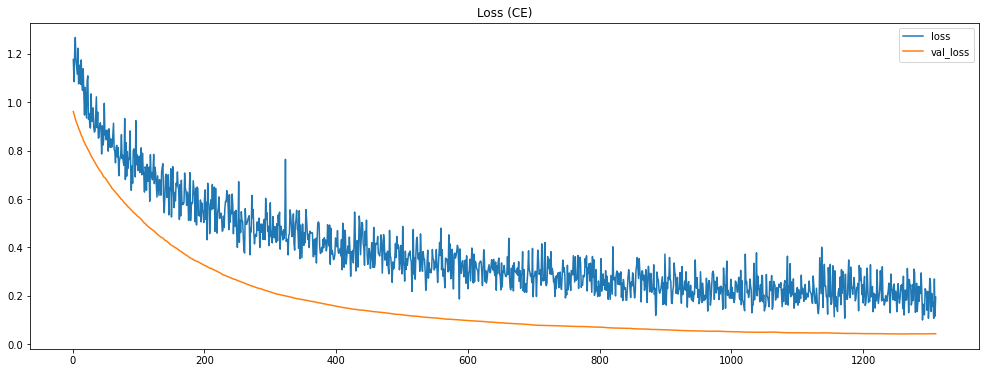

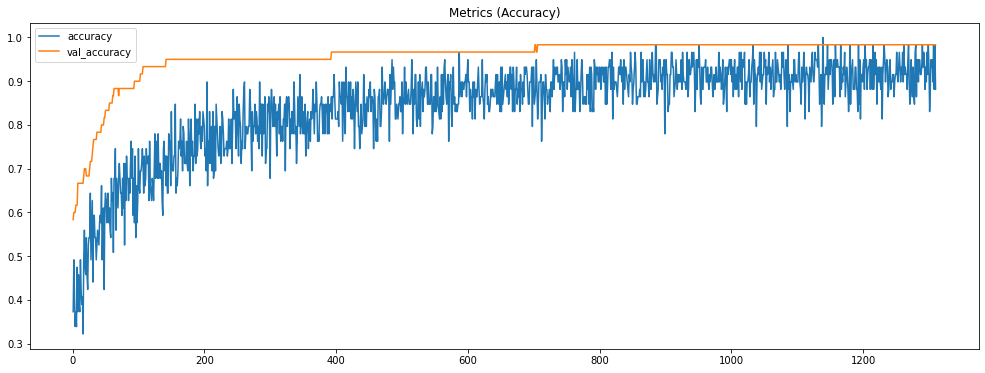

In [25]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (CE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, log.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [26]:
print('Train set:')
print_metrics(ohe.inverse_transform(y_train), model.predict_classes(x_train)[:,np.newaxis])

print()
print('Valid set:')
print_metrics(ohe.inverse_transform(y_valid), model.predict_classes(x_valid)[:,np.newaxis])

print()
print('Test set:')
print_metrics(ohe.inverse_transform(y_test), model.predict_classes(x_test)[:,np.newaxis])

Train set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Valid set:
Accuracy : 0.98
Precision: 0.99
Recall   : 0.98
F1-score : 0.98

Test set:
Accuracy : 0.98
Precision: 0.98
Recall   : 0.98
F1-score : 0.98


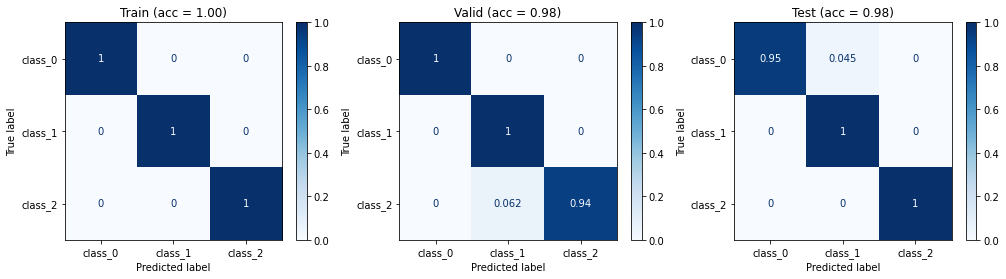

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 4))
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_train)), 
                  model.predict_classes(x_train), wine.target_names, ax1, 'Train')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_valid)), 
                  model.predict_classes(x_valid), wine.target_names, ax2, 'Valid')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_test)), 
                  model.predict_classes(x_test), wine.target_names, ax3, 'Test')
plt.show()